In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

In [2]:
fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow.nc'

ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
ds.close()

In [3]:
#Select peak snow dates
dsmall = ds.sel(time='2013')
dsmall.close()

ds = dsmall
ds.close()
ds

# '''peak snow depth dates....(?)'''
# flist = list(flist[i] for i in (0,7,22,28,41,49))
# dates = list(dates[i] for i in (0,7,22,28,41,49))

<xarray.Dataset>
Dimensions:  (time: 6, x: 17569, y: 17002)
Coordinates:
  * x        (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
  * y        (y) float32 4230327.0 4230324.0 4230321.0 ... 4179327.0 4179324.0
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2013-06-08
    mask     (y, x) uint8 dask.array<shape=(17002, 17569), chunksize=(1000, 1000)>
    dem      (y, x) float32 dask.array<shape=(17002, 17569), chunksize=(1000, 1000)>
    veg      (y, x) float32 dask.array<shape=(17002, 17569), chunksize=(1000, 1000)>
Data variables:
    snow     (time, y, x) int16 dask.array<shape=(6, 17002, 17569), chunksize=(1, 1000, 1000)>

In [4]:
# plt.imshow(ds.snow[0]/1000, cmap='coolwarm'); plt.colorbar(); plt.title('One snow depth image'); plt.show() #zeros outside of mask because nans=float, 0=ints
# plt.imshow(ds.dem, cmap='terrain'); plt.colorbar(); plt.title('DEM'); plt.show()
# plt.imshow(ds.veg, cmap='Greens'); plt.colorbar(); plt.title('Veg Height'); plt.show()

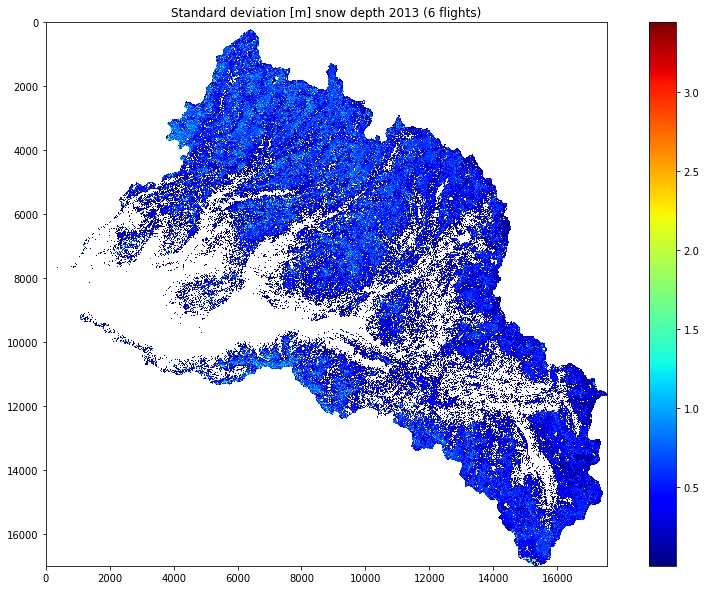

In [6]:
#std over 2013
std=ds.snow.std(dim='time')
std = np.where(std>.001, std, np.nan)

fig = plt.figure(figsize=(15, 10))
plt.imshow(std/1000, cmap='jet')
plt.colorbar()
plt.title('Standard deviation [m] snow depth 2013 (6 flights)')
plt.show()

Text(0.5, 1.0, 'Snow Depth [mm] above 2900m one time 2013')

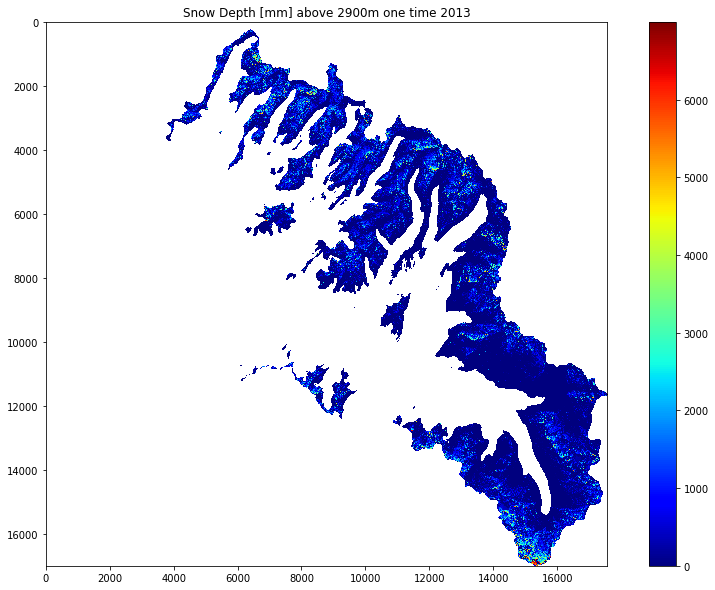

In [10]:
#sd above treeline

# d = ds.snow.where(ds.snow>0)
# print(d)
sd_above_treeline = ds.snow.where(ds.dem > 2900)

fig = plt.figure(figsize=(15, 10))
plt.imshow(sd_above_treeline[3], cmap='jet')
plt.colorbar()
plt.title('Snow Depth [mm] above 2900m one time 2013')

In [8]:
sd_above_treeline

<xarray.DataArray 'snow' (time: 6, y: 17002, x: 17569)>
dask.array<shape=(6, 17002, 17569), dtype=float64, chunksize=(1, 1000, 1000)>
Coordinates:
  * x        (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
  * y        (y) float32 4230327.0 4230324.0 4230321.0 ... 4179327.0 4179324.0
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2013-06-08
    mask     (y, x) uint8 dask.array<shape=(17002, 17569), chunksize=(1000, 1000)>
    dem      (y, x) float32 dask.array<shape=(17002, 17569), chunksize=(1000, 1000)>
    veg      (y, x) float32 dask.array<shape=(17002, 17569), chunksize=(1000, 1000)>

#### standardize snow depth function

In [ ]:
## MM working


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#  standardize lidar

def standard(x):
    a = np.where(x>0, x, np.nan)
    return x/np.nanmean(a)

s = xr.apply_ufunc(standard, ds.snow, dask='parallelized', output_dtypes=[np.int16])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#  compute normalized stand dev for peak SWE dates
s_std=np.nanstd(s,axis=0) #np language

In [ ]:
fig = plt.figure(figsize=(15, 10))
plt.imshow(np.where(s_std>0,s_std,np.nan),cmap='jet', vmax=1)
plt.colorbar()
plt.title('Standard deviation snow depth 2013 (6 flights)')
plt.show()

In [ ]:
ds

In [ ]:
## MM with Charlie

# # Normalized variance for flights closest to peak SWE dates
# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# # 1). mean snow depth for each year (get 6 means for each year, 2013-2018 (compute without zeros ideally))
# # means=ds.snow.mean(dim=('x', 'y')) #ds.mean(dim=('x','y')--mean over all layers)
# # means

# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# # 2). standardize lidar

# def standard(x):
#     a = np.where(x>0, x, np.nan)
#     return x/np.nanmean(a)

# s = xr.apply_ufunc(standard, ds.snow)

# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# # 3). compute normalized variance for peak SWE dates
# s_var=np.nanvar(s,axis=0) #np language